## Introduction

The COVID-19 pandemic significantly disrupted the U.S. economy, leading to an unexpected surge in inflation in 2021 following the relaxation of restrictions [@furman2022]. This inflationary spike was primarily driven by disruptions in global supply chains and a pronounced shift in consumer demand from services to goods [@bernanke2023].

These economic changes have posed challenges for the Federal Reserve (FED) as it navigates its dual mandate of maintaining price stability and achieving maximum employment amidst ongoing supply chain disruptions and evolving consumer behavior patterns [@ferguson2023; @guerrieri2022]. Economists have debated whether the current inflationary pressures stem from temporary supply bottlenecks and pent-up demand [@stiglitz2022] or broader structural issues exacerbated by uneven monetary policy impacts [@cavallo2023].

This study seeks to provide empirical insights into the current inflation trends, drivers and expectations. By addressing the following questions, it aims to inform policymakers and stakeholders about effective strategies for managing inflation and promoting economic stability.

## Research Questions

1. How are current inflation dynamics evolving?
2. What factors primarily drive current inflation trends?
3. To what extent are current inflation expectations anchored?

In [1]:
#| warning: false
#| echo: false

# Load the required libraries for this research project
# Import fred library for retrieving FRED data
from fredapi import Fred

# limport libraries for preprocessing
import numpy as np
import pandas as pd

# Import libraries for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Import Warnings
import warnings

# Import libraries to display tables
from IPython.display import Markdown, display

# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
#| warning: false
#| echo: false

# if you have a FRED API key connect to FRED by uncommenting the lines below
# By default, this notebook utilizes the xlsx file provided

# Connect to FRED
#fred = Fred(api_key='insert-your-api-key') # Insert your API key

# Retrieve data from FRED

#headline_pce = fred.get_series('PCEPI') # Headline PCE
#core_pce = fred.get_series('PCEPILFE') # Core PCE
#core_cpi = fred.get_series('CPILFESL') # Copre CPI
#mich = fred.get_series('MICH') # University of Michigan 1-Year Inflation Expectation
#t10yie = fred.get_series('T10YIE')  # 10-Year Breakeven Inflation Rate

# Filter the data up to April 2024, the date when the data was available and used for this study
#end_date = '2024-04-30'  # Last date of April 2024

#headline_pce = headline_pce[headline_pce.index <= end_date]
#core_pce = core_pce[core_pce.index <= end_date]
#core_cpi = core_cpi[core_cpi.index <= end_date]
#mich = mich[mich.index <= end_date]
#t10yie = t10yie[t10yie.index <= end_date]

## How are current inflation dynamics evolving?

This study examines current inflation trends using two key indicators: Headline Personal Consumption Expenditure (PCE) and Core PCE. Headline PCE includes food and energy prices, providing a broad view of inflation, while Core PCE, the Federal Reserve's preferred measure, excludes these volatile components to focus on underlying trends. Additionally, the Core PCE is compared with the Core Consumer Price Index (CPI) to identify any discrepancies.

These indicators are chosen for their comprehensive view of inflation dynamics, given their different construction methods, formulas, weights, and scopes [@johnson2017]. Historically, the 12-month CPI inflation has averaged 0.30 percentage points higher than PCE inflation, though this differential has varied over time [@janson2020].

The study uses various visualizations: a line chart of Headline and Core PCE over time to highlight trends and comparisons, a combined plot of Core PCE with annual rates and short-term changes, and a box plot comparing 12-month Core CPI and Core PCE to show distribution differences and central tendencies. Additionally, a synopsis of the annualized rates for Core CPI and Core PCE over 1-month, 3-month, 6-month, and 12-month periods from the past three months provides an overview of recent inflation trends.

### Data Overview:

* **Headline PCE**: PCE measures the goods and services purchased by “persons” that is, by households and by nonprofit institutions serving households —who are US resident. The Headline PCE includes food and energy [@usbea2024b].
* **Core PCE**: Core PCE does not account for food and energy [@usbea2024a].
* **Core CPI**: The CPI measures the change in the out-of-pocket expenditures of all urban households and the PCE index measures the change in goods and services consumed by all households, and nonprofit institutions serving households less food and energy [@usbls2024].

In [3]:
#| warning: false
#| echo: false

# If you decided to use the FRED API, uncomment this cell
#inflation_data = pd.DataFrame({
#    'Headline PCE': headline_pce,
#    'Core PCE': core_pce,
#    'Core CPI': core_cpi
#})

# Rename the index to 'Date'
#inflation_data = inflation_data.rename_axis('Date')

In [4]:
#| warning: false
#| echo: false

# Load the xlsx file (dataset) provided with this notebook
# And read the worksheet named "Inflation Data - Monthly"
inflation_dataset = pd.read_excel('./inflation-dataset.xlsx', 
                                  sheet_name= 'Inflation Data - Monthly')

In [5]:
#| warning: false
#| echo: false

# If using API uncommment this
# Get the data needed to answer the first research question
inflation_data = inflation_dataset[['Date', 'Headline PCE', 'Core PCE', 'Core CPI']]

# Set "Date" as index
inflation_data.set_index('Date', inplace=True)

In [6]:
#| warning: false
#| echo: false

# Now let's do some preprocess, transform and do some feature extraction.

# Calculate Core PCE month-over-month variation
inflation_data['Core PCE MoM'] = inflation_data['Core PCE'].pct_change() 

# Calculate Core PCE Monthly Rate Annualized
inflation_data['CORE PCE 1M Annualized'] = (((inflation_data['Core PCE'] / inflation_data['Core PCE'].shift(1)) ** 12) - 1) * 100

# Calculate the 3-month change of Core PCE
inflation_data['CORE PCE 3M Annualized'] = ((1 + inflation_data['Core PCE MoM'].rolling(window=3).sum() / 3)**12 - 1) * 100

# Calculate the 6-month change of Core PCE
inflation_data['CORE PCE 6M Annualized'] = ((1 + inflation_data['Core PCE MoM'].rolling(window=6).sum() / 6)**12 - 1) * 100

# Calculate the yearly change of Core PCE
inflation_data['CORE PCE 12M Annualized'] = ((1 + inflation_data['Core PCE MoM'].rolling(window=12).sum() / 12)**12 - 1) * 100

# Calculate Headline and Core PCE Year-Over-Year
inflation_data['Headline PCE YoY'] = inflation_data['Headline PCE'].pct_change(periods=12) * 100
inflation_data['Core PCE YoY'] = inflation_data['Core PCE'].pct_change(periods=12) * 100

# Calculate Core CPI month-over-month variation
inflation_data['Core CPI MoM'] = (inflation_data['Core CPI'] / inflation_data['Core CPI'].shift(1)) - 1

# Calculate Core CPI Monthly Rate Annualized
inflation_data['CORE CPI 1M Annualized'] = ((1 + inflation_data['Core CPI MoM'].rolling(window=1).sum())**12 - 1) * 100

# Calculate the 3-month change of Core CPI
inflation_data['CORE CPI 3M Annualized'] =  ((1 + inflation_data['Core CPI MoM'].rolling(window=3).sum() / 3)**12 - 1) * 100

# Calculate the 6-month change of Core PCE
inflation_data['CORE CPI 6M Annualized'] = ((1 + inflation_data['Core CPI MoM'].rolling(window=6).sum() / 6)**12 - 1) * 100

# Calculate the yearly change of Core PCE
inflation_data['CORE CPI 12M Annualized'] = ((1 + inflation_data['Core CPI MoM'].rolling(window=12).sum() / 12)**12 - 1) * 100

# Calculate year-over-year change (YoY) for Core CPI
inflation_data['Core CPI YoY'] = inflation_data['Core CPI'].pct_change(periods=12) * 100

# Calculate three-month moving average
inflation_data['Headline PCE 3M-YOY MA'] = inflation_data['Headline PCE YoY'].rolling(window=3).mean()
inflation_data['Core PCE 3M-YOY MA'] = inflation_data['Core PCE YoY'].rolling(window=3).mean()

# Filter data from 2019 onwards which represents the temporal range of time series visualisation
inflation_data = inflation_data[inflation_data.index >= '2021-01-01']

# Drop missing values
inflation_data = inflation_data.dropna()

### Analysis

Figure 1 illustrates how Headline and Core Personal Consumption Expenditures (PCE) have evolved, using a 3-month moving average to reveal trends. At the start of 2021, inflation surged, prompting the Federal Reserve to raise interest rates. As COVID-19 restrictions eased and the economy recovered, disruptions in supply chains and consumer demand began to settle.

This recovery is reflected in the declining trends of both Core and Headline PCE, indicating a slowdown in inflationary pressures. The return to pre-pandemic levels demonstrates the U.S. economy's resilience. With the end of the pandemic, inflation is moving closer to the 2% target [@federalboard2020], marking a return to stability.

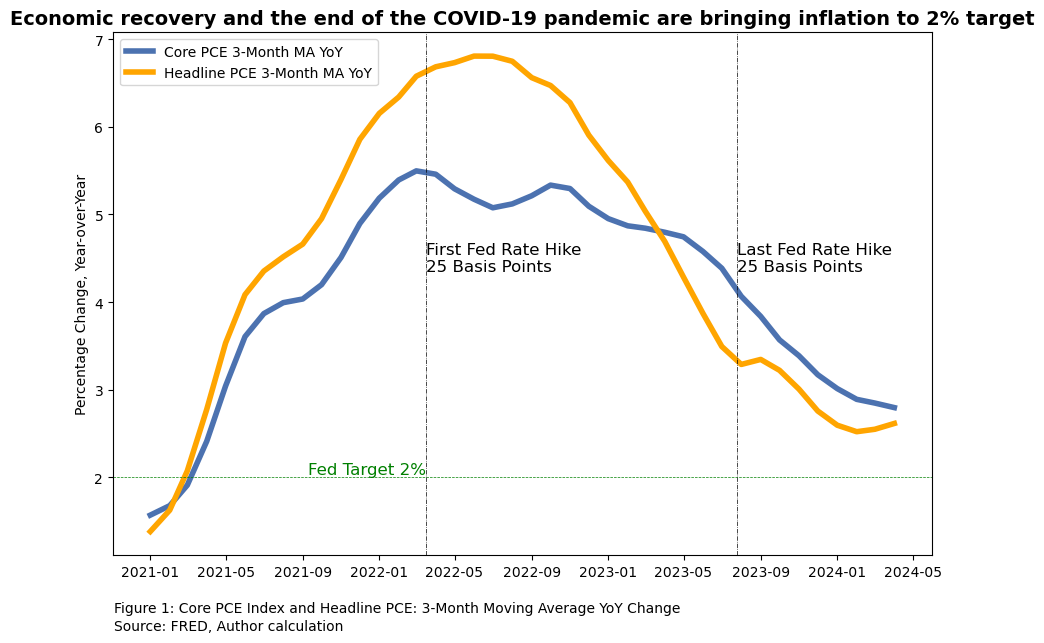

In [7]:
#| warning: false
#| echo: false


# Get date of the first FED hike and convert it to timestap
first_rate_hike_date = pd.Timestamp('2022-03-17')
# Get date of the last FED hike and convert it to timestap
last_rate_hike_date = pd.Timestamp('2023-07-26')

# Plot Figure 1: Core PCE Index and Headline PCE: 3-Month Moving Average YoY Change
# Set Figure size
plt.figure(figsize=(9, 6))

# Plot 3-month moving average YoY change for Core PCE with seaborn
sns.lineplot(data=inflation_data, 
             x=inflation_data.index, 
             y='Core PCE 3M-YOY MA', 
             color='#4C72B0',
             linewidth=4,
             label='Core PCE 3-Month MA YoY')

# Plot 3-month moving average YoY change for Headline PCE with seaborn
sns.lineplot(data=inflation_data, 
             x=inflation_data.index, 
             y='Headline PCE 3M-YOY MA', 
             color='#FFA500', 
             linewidth=4,
             label='Headline PCE 3-Month MA YoY')

# Adding a horizontal line at 2% for FED inflation target
plt.axhline(y=2, color='green', linestyle='--', linewidth=0.5)

# Adding a vertical line at March 17, 2022 for first FED hike
plt.axvline(x=first_rate_hike_date, color='black', linestyle='-.', linewidth=0.5)
# Adding a vertical line at July 26, 2023 for last FED hike
plt.axvline(x=last_rate_hike_date, color='black', linestyle='-.', linewidth=0.5)

# Adding the annotation for the first Fed rate hike
plt.text(first_rate_hike_date, 4.5, 
         'First Fed Rate Hike\n25 Basis Points', 
         ha='left', va='center', fontsize=12, color='black', rotation=0)

# Adding the annotation for the last Fed rate hike
plt.text(last_rate_hike_date, 4.5, 
         'Last Fed Rate Hike\n25 Basis Points', 
         ha='left', va='center', fontsize=12, color='black', rotation=0)

# Adding the annotation for the Fed Target
plt.text(first_rate_hike_date, 2,
         'Fed Target 2%', 
         ha='right', va='bottom', fontsize=12, color='green', rotation=0)

# Adding labels and title
plt.title('Economic recovery and the end of the COVID-19 pandemic are bringing inflation to 2% target',
         fontsize=14, 
         fontweight='bold')
plt.ylabel('Percentage Change, Year-over-Year')
plt.xlabel(None)

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

# Display the legend
plt.legend()

# Adding annotations to the figure
plt.figtext(0.06, -0.03, 'Figure 1: Core PCE Index and Headline PCE: 3-Month Moving Average YoY Change', ha='left', fontsize=10)
plt.figtext(0.06, -0.06, 'Source: FRED, Author calculation', ha='left', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

However, despite the positive signs, short-term indicators reveal ongoing challenges. In Figure 2, the red line representing the Core PCE 3-month rate annualized shows that as of April 2024, it remains above the 2% target, standing at 3.46%. This highlights that while progress has been made, inflationary pressures persist in the short term.

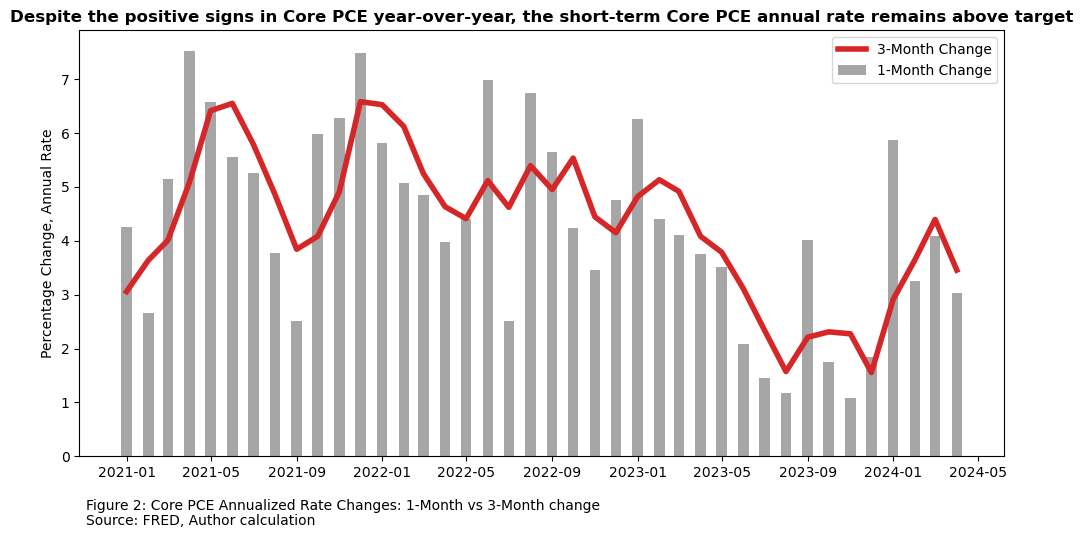

In [8]:
#| warning: false
#| echo: false

# Plot Figure 2: Core PCE Annualized Rate Changes: 1-Month vs 3-Month Moving Average
# Define figure and figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Bar chart for annualized rate
bar_width = 15  # Adjust the width of bars as needed
bar_alpha = 0.7  # Adjust the transparency of bars
ax.bar(inflation_data.index, inflation_data['CORE PCE 1M Annualized'], width=bar_width, alpha=bar_alpha, color='grey', label='1-Month Change')

# Line plot for 3-month moving average annualized rate
ax.plot(inflation_data.index, inflation_data['CORE PCE 3M Annualized'], color='#d62728', label='3-Month Change', linewidth=4)

# Customize plot
# Set title
ax.set_title('Despite the positive signs in Core PCE year-over-year, the short-term Core PCE annual rate remains above target',
              fontweight='bold')
# Set y-axis label
ax.set_ylabel('Percentage Change, Annual Rate')

# Remove Grid 
ax.grid(False)

# Show legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)


# Adding annotations to the figure (if needed)
plt.figtext(0.06, -0.03, 'Figure 2: Core PCE Annualized Rate Changes: 1-Month vs 3-Month change', ha='left', fontsize=10)
plt.figtext(0.06, -0.06, 'Source: FRED, Author calculation', ha='left', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Compounding this situation is the observation that the current annualized rate of Core CPI over the past 12 months exceeds that of Core PCE. This disparity, illustrated in Figure 3's box plot, highlights persistent elevated inflation in the medium to longer term compared to January 2021, emphasizing ongoing economic difficulties. This discrepancy is notably higher than the historical average.

While both Core CPI and Core PCE rates are below their respective first quartile ranges from January 2021 to April 2024, the 12-month differentials in April 2024 are notable: Core CPI stands at 3.62%, significantly higher than Core PCE at 1.75%, resulting in a difference of 1.87 percentage points. Further research might be needed to explore this significant difference and its impact on policymaking decisions.

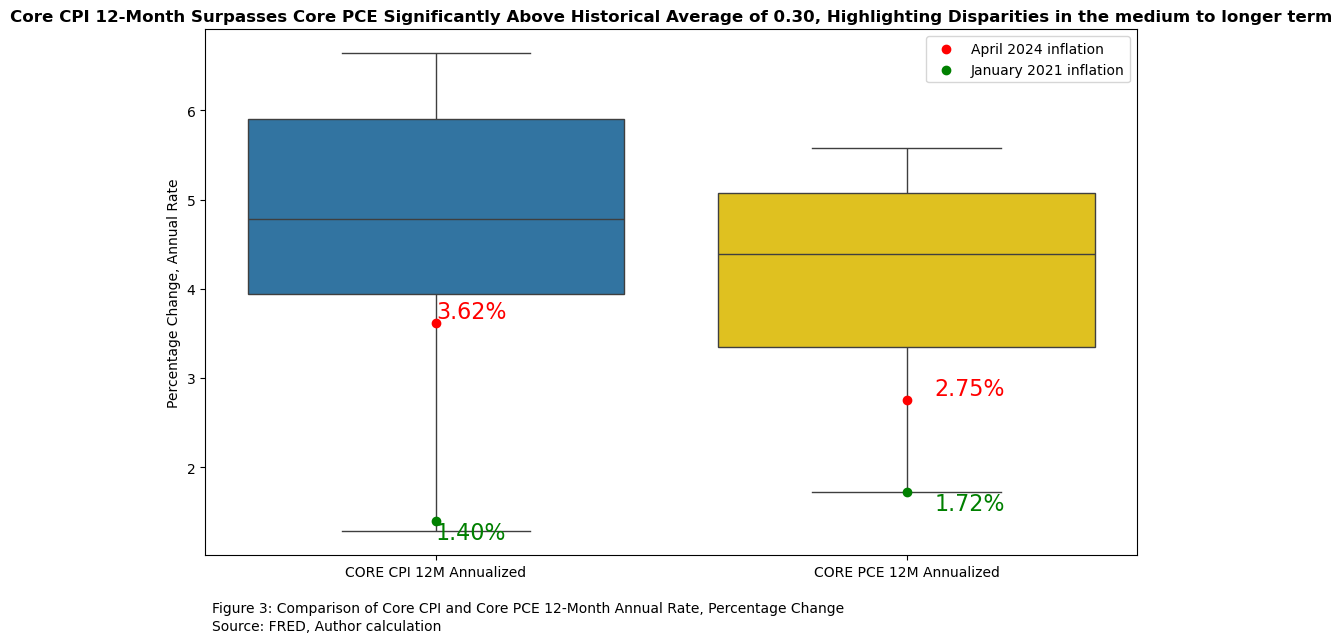

In [9]:
#| warning: false
#| echo: false

# Plot Figure 3: Comparison of Core CPI and Core PCE 3-Month Annual Rate, Percentage Change
# Define figure size
plt.figure(figsize=(10, 6))

# Define colors to enhance the contrast between the box plots for clearer comparison
gold = '#FFD700'
blue = '#1f77b4'

# Plotting the box plot for Core CPI YoY and Core PCE YoY
sns.boxplot(data=inflation_data[['CORE CPI 12M Annualized', 'CORE PCE 12M Annualized']], palette=[blue, gold])

# Adding title and axis labels
plt.title('Core CPI 12-Month Surpasses Core PCE Significantly Above Historical Average of 0.30, Highlighting Disparities in the medium to longer term', 
          fontsize=12,
          fontweight='bold')
plt.ylabel('Percentage Change, Annual Rate')

# Highlighting the last month's data point with a red scatter plot
last_month_data = inflation_data.iloc[-1]
plt.scatter(x=[0, 1], y=[last_month_data['CORE CPI 12M Annualized'], 
                         last_month_data['CORE PCE 12M Annualized']], 
            color='red', label='April 2024 inflation', zorder=5)

# Highlighting the first month's data point with a green scatter plot
first_month_data = inflation_data.iloc[0]
plt.scatter(x=[0, 1], y=[first_month_data['CORE CPI 12M Annualized'], 
                         first_month_data['CORE PCE 12M Annualized']], 
            color='green', label='January 2021 inflation', zorder=5)

# Adding annotations to the red dot with month and value
plt.text(0.15, last_month_data['CORE CPI 12M Annualized'], 
         f"{last_month_data['CORE CPI 12M Annualized']:.2f}%", 
         ha='right', va='bottom', fontsize=16, color='red')
plt.text(1.06, last_month_data['CORE PCE 12M Annualized'], 
         f"{last_month_data['CORE PCE 12M Annualized']:.2f}%", 
         ha='left', va='bottom', fontsize=16, color='red')

# Adding annotations to the green dot with month and value
plt.text(0.15, first_month_data['CORE CPI 12M Annualized'], 
         f"{first_month_data['CORE CPI 12M Annualized']:.2f}%", 
         ha='right', va='top', fontsize=16, color='green')
plt.text(1.06, first_month_data['CORE PCE 12M Annualized'], 
         f"{first_month_data['CORE PCE 12M Annualized']:.2f}%", 
         ha='left', va='top', fontsize=16, color='green')

# Adding annotations to the figure
plt.figtext(0.06, -0.03, 'Figure 3: Comparison of Core CPI and Core PCE 12-Month Annual Rate, Percentage Change', 
            ha='left', fontsize=10)
plt.figtext(0.06, -0.06, 'Source: FRED, Author calculation', 
            ha='left', fontsize=10)

# Adjusting layout
plt.tight_layout()

# Display legend
plt.legend()

# Show the plot
plt.show()

In summary, despite inflation normalizing since mid-2022, current inflation remains persistent and significantly above the target level of 2%, complicating the Federal Reserve's actions and narrative.

Table 1 shows a summary of Core CPI and Core PCE annual rates of the last three month.

In [10]:
#| warning: false
#| echo: false

# Display Table 1: Summary of Core CPI and Core PCE Annual Rates of the Last 3 Months
# Subset the columns of interest
columns_of_interest = [
    'CORE CPI 1M Annualized', 'CORE PCE 1M Annualized', 
    'CORE CPI 3M Annualized', 'CORE PCE 3M Annualized',
    'CORE CPI 6M Annualized', 'CORE PCE 6M Annualized',
    'CORE CPI 12M Annualized', 'CORE PCE 12M Annualized'
]

# Extract the last three months of data
last_three_months_data = inflation_data[columns_of_interest].tail(3)

# Convert rates to percentages and format
last_three_months_data = last_three_months_data.applymap(lambda x: f"{x:.1f}%")

# Format the index to display dates as "Jan 2024"
last_three_months_data.index = last_three_months_data.index.strftime('%b %Y')

# Convert the DataFrame to Markdown format
markdown_table = last_three_months_data.to_markdown()

# Add Table caption
table = "Table 1"

# Add text to markdown_table
full_markdown = f"{markdown_table}\n\n{table}"

# Display the Markdown table
display(Markdown(full_markdown))

| Date     | CORE CPI 1M Annualized   | CORE PCE 1M Annualized   | CORE CPI 3M Annualized   | CORE PCE 3M Annualized   | CORE CPI 6M Annualized   | CORE PCE 6M Annualized   | CORE CPI 12M Annualized   | CORE PCE 12M Annualized   |
|:---------|:-------------------------|:-------------------------|:-------------------------|:-------------------------|:-------------------------|:-------------------------|:--------------------------|:--------------------------|
| Feb 2024 | 4.4%                     | 3.3%                     | 4.2%                     | 3.6%                     | 3.9%                     | 3.0%                     | 3.8%                      | 2.8%                      |
| Mar 2024 | 4.4%                     | 4.1%                     | 4.5%                     | 4.4%                     | 3.9%                     | 3.0%                     | 3.8%                      | 2.8%                      |
| Apr 2024 | 3.6%                     | 3.0%                     | 4.1%                     | 3.5%                     | 4.0%                     | 3.2%                     | 3.6%                      | 2.8%                      |

Table 1

## What factors primarily drive current inflation trends?

Despite the normalization of inflation trends following the COVID-19 shocks, the Core PCE annualized rates indicate persistent inflationary pressures. This necessitates an investigation into the primary factors driving current inflation trends. To achieve this, the Core and Supercore PCE components were analyzed, and the changes were visualized using stacked bar charts to identify the primary drivers of inflation. Additionally, a summary of the Supercore PCE annualized rates over 1-month, 3-month, 6-month, and 12-month intervals of the most recent three months provides a comprehensive perspective on this critical component.

### Data Overview

The data utilized for this analysis was sourced from the Bureau of Economic Analysis and accessed via the Federal Reserve Bank of San Francisco [-@federalsanfrancisco2024]. The key components analyzed include:

* **Core PCE Components**: Represent the Headline PCE minus Food and Energy components, which the FED is currently monitoring closely.
* **Supercore PCE Components**: Represent the Core Services excluding housing component of Core PCE, comprising Health Care, Financial Services & Insurance, Food Services & Accommodations, Transportation Services, and Other Services. Also this component is closely watched by the FED.

It's important to note that while analyzing the Core and Supercore PCE components provides insights into inflation trends, identifying CPI components and their drivers might further enhance the study. However, CPI is not addressed in this research as it focuses specifically on Core PCE components by taking a FED perspective.

In [11]:
#| warning: false
#| echo: false

# Load Core PCE YoY components
corepce_decomposed_yoy = pd.read_excel('./inflation-dataset.xlsx', 
                                       sheet_name= 'Core PCE Components YoY')

# Set 'date' column as index
corepce_decomposed_yoy.set_index('date', inplace=True)

# List of Core PCE components
corepce_components = ['Core Goods', 'Core Services exc. Housing', 'Housing']

# Filter data from '2019-01-01' onwards
corepce_decomposed_yoy_filtered = corepce_decomposed_yoy[corepce_decomposed_yoy.index >= '2019-01-01']

# Convert to datetime index
corepce_decomposed_yoy_filtered.index = pd.to_datetime(corepce_decomposed_yoy_filtered.index).date

# Load Supercore PCE YoY components
supercorepce_decomposed_yoy = pd.read_excel('./inflation-dataset.xlsx', 
                                       sheet_name= 'Supercore PCE components YoY')

# Set 'date' column as index
supercorepce_decomposed_yoy.set_index('date', inplace=True)


# Define components of Supercore PCE
supercorepce_components = ['Health Care', 'Financial Services & Insurance', 
              'Food Services & Accommodations', 'Transportation Services', 'Other Services']

# Filter data from '2019-01-01' onwards
supercorepce_decomposed_yoy_filtered = supercorepce_decomposed_yoy[supercorepce_decomposed_yoy.index >= '2019-01-01']

# Convert to datetime index
supercorepce_decomposed_yoy_filtered.index = pd.to_datetime(supercorepce_decomposed_yoy_filtered.index).date

# Load Supercore PCE MoM components
supercorepce_decomposed_mom = pd.read_excel("./inflation-dataset.xlsx", 
                                   sheet_name='Supercore PCE components MoM')
# Calculate Supercore PCE Monthly Rate Annualized
supercorepce_decomposed_mom['Supercore PCE 1M Annualized'] = ((1 + (supercorepce_decomposed_mom['Total Supercore Services MoM'] / 100)) ** 12 - 1) * 100

# Calculate the 3-month change of Supercore PCE
supercorepce_decomposed_mom['Supercore PCE 3M Annualized'] = ((1 + (supercorepce_decomposed_mom['Total Supercore Services MoM']/100).rolling(window=3).sum() / 3)**12 - 1) * 100

# Calculate the 6-month change of Supercore PCE
supercorepce_decomposed_mom['Supercore PCE 6M Annualized'] = ((1 + (supercorepce_decomposed_mom['Total Supercore Services MoM']/100).rolling(window=6).sum() / 6)**12 - 1) * 100

# Calculate the yearly change of Supercore PCE
supercorepce_decomposed_mom['Supercore PCE 12M Annualized'] = ((1 + (supercorepce_decomposed_mom['Total Supercore Services MoM']/100).rolling(window=12).sum() / 12)**12 - 1) * 100

# Set 'date' column as index
supercorepce_decomposed_mom.set_index('date', inplace=True)

### Analysis

Figure 4 corroborates the conclusions drawn by Bernanke & Blanchard [-@bernanke2023], indicating that core inflation between early 2021 and mid-2022 was primarily influenced by core goods in response to the COVID-19 shock, followed by a subsequent normalization.

However, Core Services (Supercore inflation) and Housing segments have sustained elevated levels.

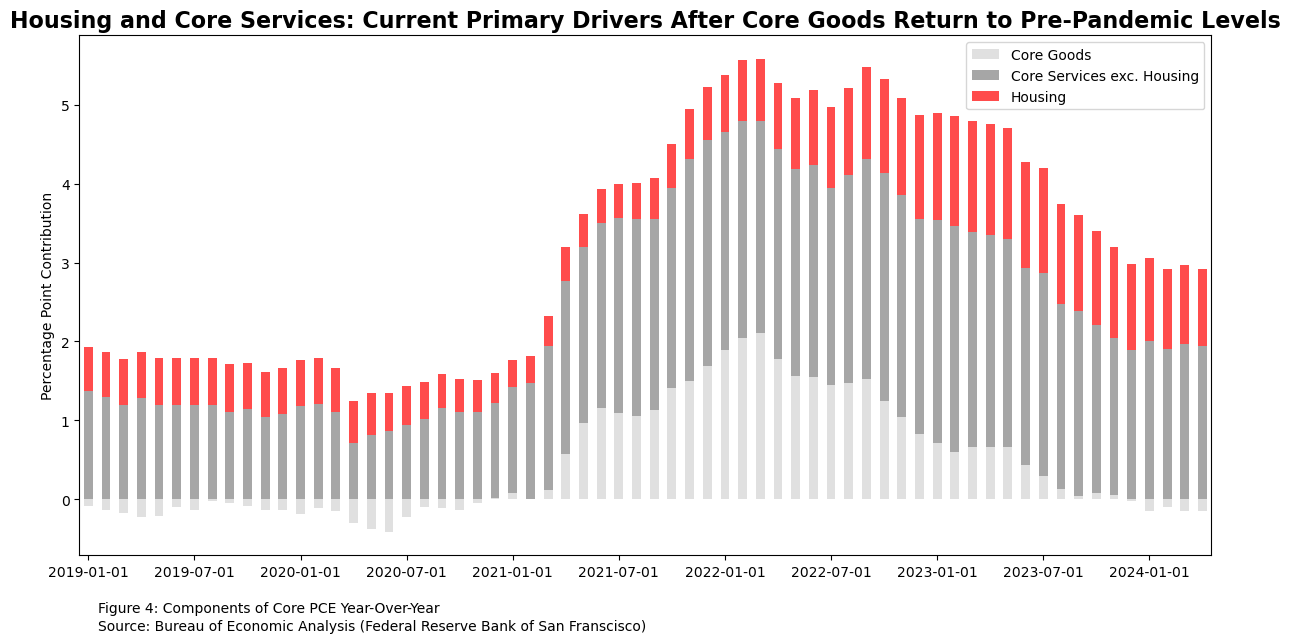

In [12]:
#| warning: false
#| echo: false

# Plot Figure 4: Components of Core PCE YoY
# Define Figure size using subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Define a color palette for the components
# the colors were chosen to facilitate comprehension
colors = ['lightgrey', 'grey', 'red']


# Plot the stacked bar to show each component on the specified axis
ax = corepce_decomposed_yoy_filtered[corepce_components].plot(kind='bar', stacked=True, color=colors, alpha=0.7, ax=ax)

# Format the plot
ax.set_title('Housing and Core Services: Current Primary Drivers After Core Goods Return to Pre-Pandemic Levels', 
             fontsize=16, fontweight='bold')
ax.set_ylabel('Percentage Point Contribution', 
              fontsize=10)
N = 6  # Show every 6 months 
ax.set_xticks(range(0, len(corepce_decomposed_yoy_filtered.index), N))
ax.set_xticklabels(corepce_decomposed_yoy_filtered.index[::N], rotation=0, ha='center', fontsize=10)
ax.tick_params(axis='y', labelsize=10)

# Adding annotations to the figure
fig.text(0.06, -0.03, 'Figure 4: Components of Core PCE Year-Over-Year', ha='left', fontsize=10)
fig.text(0.06, -0.06, 'Source: Bureau of Economic Analysis (Federal Reserve Bank of San Franscisco)', ha='left', fontsize=10)

# Rename legend label for one component
legend_labels = list(corepce_components) 
legend_labels[1] = 'Core Services exc. Housing (Supercore PCE)'  
ax.legend(legend_labels)

# Show legend
ax.legend()

# Adjust Layout
plt.tight_layout()

# Display plot
plt.show()

Specifically, Figure 5 highlights the Supercore PCE components, emphasizing that Other Services and Financial Services & Insurance are driving forces.

This suggests potential challenges in the labor market [@birinci2023], given the persistent elevation in Supercore PCE.

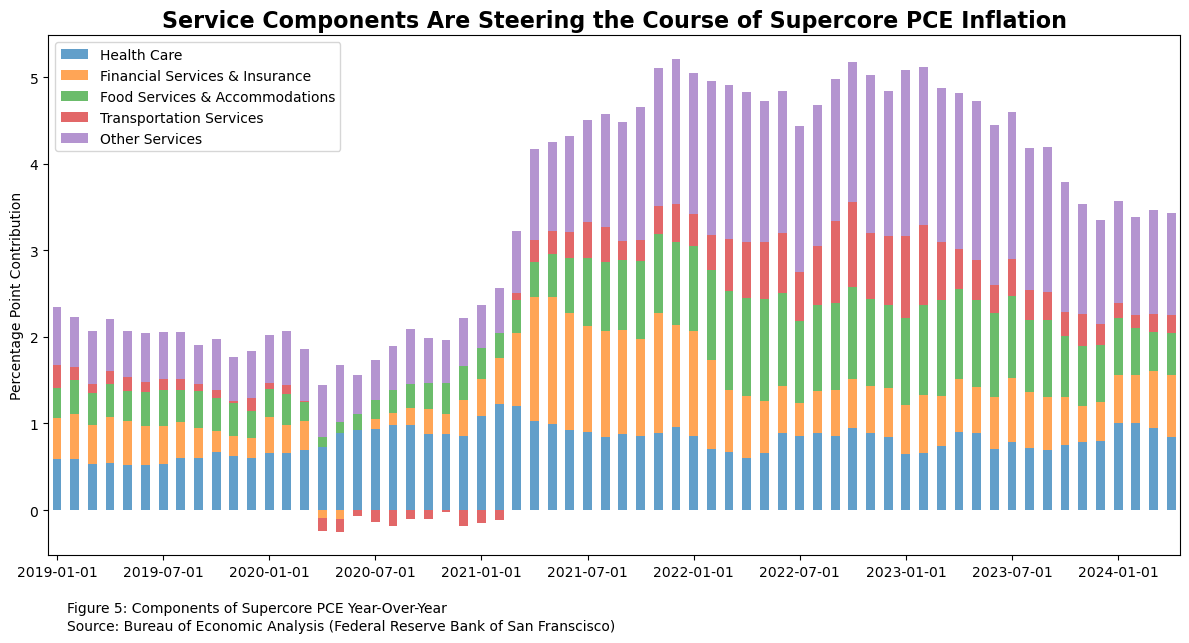

In [13]:
#| warning: false
#| echo: false

# Plot Figure 5: Components of Supercore PCE YoY
# Define Figure size using subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Adjust colors for better clarity and contrast
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot the stacked bar to show each component on the specified axis
ax = supercorepce_decomposed_yoy_filtered[supercorepce_components].plot(kind='bar', 
                                                                        stacked=True, 
                                                                        color=colors, alpha=0.7, ax=ax)

# Format the plot
ax.set_title('Service Components Are Steering the Course of Supercore PCE Inflation',fontsize=16, fontweight='bold')
ax.set_ylabel('Percentage Point Contribution', fontsize=10)
N = 6  # Show every 6 months 
ax.set_xticks(range(0, len(supercorepce_decomposed_yoy_filtered.index), N))
ax.set_xticklabels(supercorepce_decomposed_yoy_filtered.index[::N], rotation=0, ha='center', fontsize=10)
ax.tick_params(axis='y', labelsize=10)

# Adding annotations to the figure
fig.text(0.06, -0.03, 'Figure 5: Components of Supercore PCE Year-Over-Year', ha='left', fontsize=10)
fig.text(0.06, -0.06, 'Source: Bureau of Economic Analysis (Federal Reserve Bank of San Franscisco)',ha='left', fontsize=10)

# Show legend
ax.legend()

# Adjust Layout
plt.tight_layout()

# Display plot
plt.show()

Table 2 provides a summary of the 1-month, 3-month, 6-month, and 12-month annualized Supercore inflation rates for the most recent three months.

In [14]:
#| warning: false
#| echo: false

# Display Table 2: Summary of Supercore PCE Annual Rates of the Last 3 Months
# Subset the columns of interest
columns_of_interest = [
    'Supercore PCE 1M Annualized', 'Supercore PCE 3M Annualized',
    'Supercore PCE 6M Annualized', 'Supercore PCE 12M Annualized'
]

# Extract the last three months of data
last_three_months_data = supercorepce_decomposed_mom[columns_of_interest].tail(3)

# Convert rates to percentages and format
last_three_months_data = last_three_months_data.applymap(lambda x: f"{x:.1f}%")

# Format the index to display dates as "Jan 2024"
last_three_months_data.index = last_three_months_data.index.strftime('%b %Y')

# Reshape the DataFrame to have hierarchical columns
reshaped_data = last_three_months_data.stack(0).unstack(1)

# Convert the reshaped DataFrame to markdown
markdown_table = reshaped_data.to_markdown()

# Add Table caption
table = "Table 2"

# Add text to markdown_table
full_markdown = f"{markdown_table}\n\n{table}"

# Display the Markdown table
display(Markdown(full_markdown))

| date     | Supercore PCE 1M Annualized   | Supercore PCE 3M Annualized   | Supercore PCE 6M Annualized   | Supercore PCE 12M Annualized   |
|:---------|:------------------------------|:------------------------------|:------------------------------|:-------------------------------|
| Mar 2024 | 5.2%                          | 5.5%                          | 3.9%                          | 3.5%                           |
| Apr 2024 | 3.4%                          | 3.6%                          | 4.2%                          | 3.5%                           |
| May 2024 | 1.2%                          | 3.2%                          | 4.1%                          | 3.4%                           |

Table 2

Core Goods, which drove Core PCE during the pandemic, are returning to pre-COVID levels. Now, housing and core services are the main contributors to inflation, remaining above the FED target. The FED considers core services excluding housing as "Supercore" inflation, primarily driven by Other Services and Financial Services & Insurance. This study focuses on Core PCE, the FED’s preferred measure, without analyzing Core CPI drivers. Future research should explore Core CPI, crucial for policymakers, consumers, and market participants.

## To what extent are current inflation expectations anchored?

Individuals base their decisions on past events, current developments, and future possibilities, often creating self-fulfilling outcomes through their collective actions. This makes expectations a significant factor in economic outcomes [@federalcleveland2023].

The stability of public inflation expectations reflects the credibility of monetary policy. This study uses two key indicators: the University of Michigan Inflation Expectation for short-term household views and the 10-Year Breakeven Inflation Rate for long-term market perspectives [@lee2020]. Combining these provides a comprehensive insight into public inflation expectations.

The study uses summary tables and histograms for univariate analysis and line plots to compare the two metrics. Histograms reveal distribution patterns and outliers, while line plots show trends and relationships over time, helping to understand their correlation and anchoring behavior.

### Data Overview

* **10-Year Breakeven Inflation Rate**: This metric reflects longer-term inflation expectations derived from the difference between nominal Treasury yields and Treasury Inflation-Protected Securities (TIPS) yields [@federalstlouis2024].
* **1-Year University of Michigan Inflation Expectation**: Represents median expected price change over the next 12 months, according to the Surveys of Consumers [@umich2024].

In [15]:
#| warning: false
#| echo: false

# If connected to the FRED API
# uncomment this cell, otherwise skip it
#mich = mich.copy()
#t10yie = t10yie.copy()

In [16]:
#| warning: false
#| echo: false

# Get the variables needed for this research question
t10yie = pd.read_excel('./inflation-dataset.xlsx', 
                                  sheet_name= 'Inflation Data - Daily')

# Set "Date" as index
t10yie.set_index('Date', inplace=True)

# Get the data needed to answer the first research question
mich = inflation_dataset[['Date','University of Michigan 1-Year Inflation Expectation']]

# Set "Date" as index
mich.set_index('Date', inplace=True)

# Drop missing values
mich = mich.dropna()

In [17]:
#| warning: false
#| echo: false

# Convert Daily percentage change of T10YIE to monthly percentage change
t10yie_monthly = round(t10yie.resample('MS').mean(),2)

# Drop last two rows of T10YIE 
# to keep consistency with the released data of University of Michigan 1-Year Expected Inflation
t10yie_monthly = t10yie_monthly[:'2024-04-01']

# Filter data from September 2017 to December 2020
mich_2017_2020 = mich['2017-09-01':'2020-12-01']
t10yie_2017_2020 = t10yie_monthly['2017-09-01':'2020-12-01']

# Filter data from January 2021 to April 2024
mich_2021_2024 = mich['2021-01-01':]
t10yie_2021_2024 = t10yie_monthly['2021-01-01':'2024-04-01']

# Ensure All variables are series before proceeding with the analysis
mich = mich.squeeze()
t10yie_monthly = t10yie_monthly.squeeze()
mich_2017_2020 = mich_2017_2020.squeeze()
t10yie_2017_2020 = t10yie_2017_2020.squeeze()
mich_2021_2024 = mich_2021_2024.squeeze()
t10yie_2021_2024 = t10yie_2021_2024.squeeze()

### Analysis



The analysis of inflation expectations provides crucial insights into how consumers and markets anticipate future economic conditions. Amidst the economic disruptions caused by the COVID-19 pandemic, inflation expectations have fluctuated significantly, influencing both consumer behavior and policy decisions [@furman2022; @bernanke2023].

Historically, as depicted in Figure 6, the 1-Year University of Michigan Inflation Expectation from 1978 to 2024 has exhibited a median value of 3%, with the latest reading in April 2024 at 3.20%. This suggests that while current expectations for the next year exceed the Federal Reserve's 2% target, they remain relatively aligned with long-term historical trends, reflecting a moderated impact from the pandemic-induced shocks. This alignment indicates that consumer expectations, while higher than recent years, are not disanchored but rather reflect an adjustment to post-pandemic economic conditions.

Conversely, the 10-Year Breakeven Inflation Rate from 2003 to 2024 has shown stability and proximity to the Fed's target, indicating robust anchoring of long-term inflation expectations. Despite short-term fluctuations observed post-COVID, these metrics highlight a consistent belief in market stability over the long term, aligning closely with Federal Reserve policy objectives.

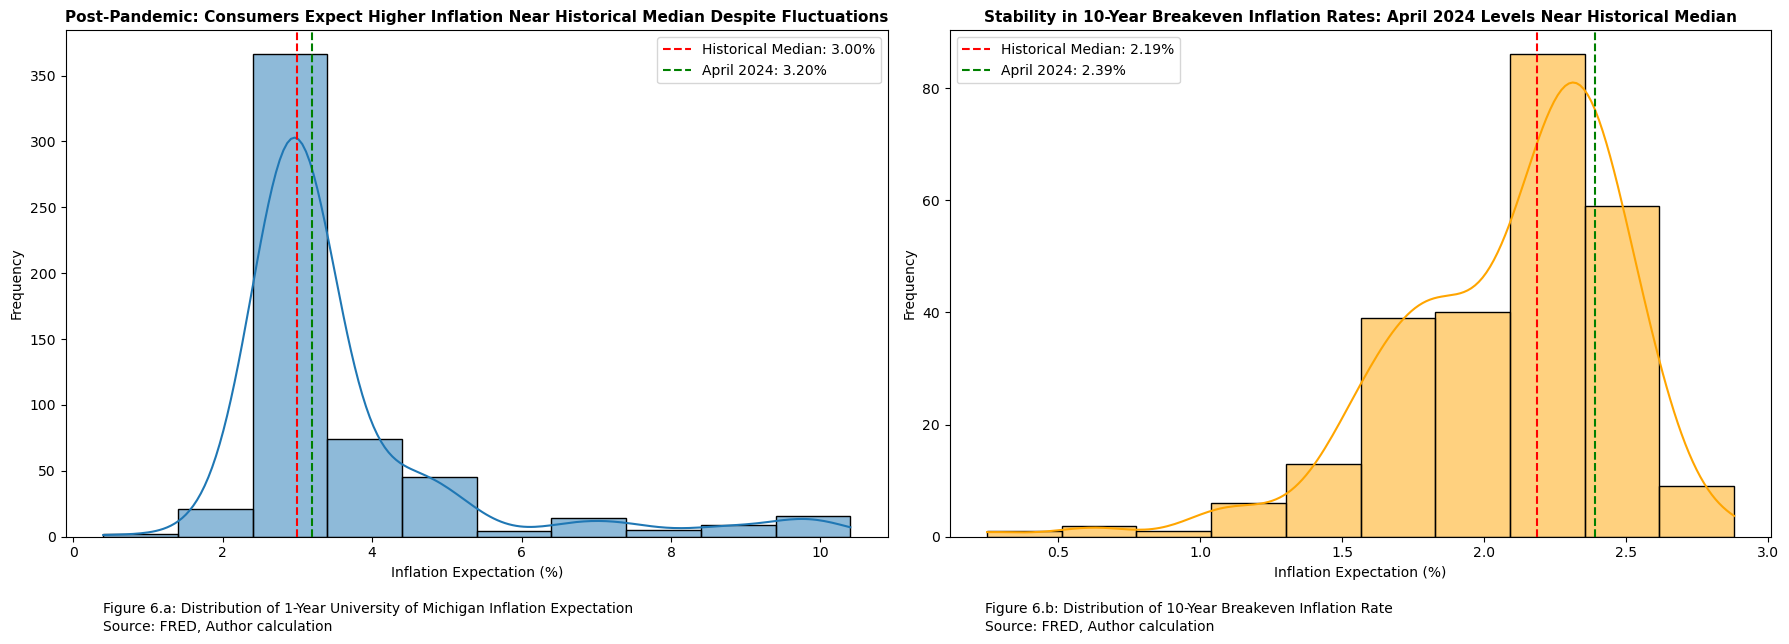

In [18]:
#| warning: false
#| echo: false

# Plot Figure 6: Distribution of historical 1-Year University of Michigan Inflation Expectation 
# And 10-Year Breakeven Inflation Rate

# Define Figure size using subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Univariate analysis (Histogram) for 1-Year University of Michigan Inflation Expectation
sns.histplot(mich, bins=10, kde=True, color='#1f77b4', ax=axes[0])
median_mich = mich.median()
last_mich = mich[-1]
axes[0].axvline(median_mich, color='red', linestyle='--', label=f'Historical Median: {median_mich:.2f}%')
axes[0].axvline(last_mich, color='green', linestyle='--', label=f'April 2024: {last_mich:.2f}%')
axes[0].set_title('Post-Pandemic: Consumers Expect Higher Inflation Near Historical Median Despite Fluctuations',
                 fontsize=11, fontweight='bold')
axes[0].set_xlabel('Inflation Expectation (%)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Univariate analysis (Histogram) for 10-Year Breakeven Inflation Rate
sns.histplot(t10yie_monthly, bins=10, kde=True, color='orange', ax=axes[1])
median_t10yie = t10yie_monthly.median()
last_t10yie = t10yie_monthly[-1]
axes[1].axvline(median_t10yie, color='red', linestyle='--', label=f'Historical Median: {median_t10yie:.2f}%')
axes[1].axvline(last_t10yie, color='green', linestyle='--', label=f'April 2024: {last_t10yie:.2f}%')
axes[1].set_title('Stability in 10-Year Breakeven Inflation Rates: April 2024 Levels Near Historical Median',
                  fontsize=11, fontweight='bold')
axes[1].set_xlabel('Inflation Expectation (%)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Adjust Layout
plt.tight_layout()

# Adding annotations to the figure 6
fig.text(0.06, -0.03, 'Figure 6.a: Distribution of 1-Year University of Michigan Inflation Expectation', ha='left', fontsize=10)
fig.text(0.06, -0.06, 'Source: FRED, Author calculation', ha='left', fontsize=10)

# Adding annotations to the figure 7
fig.text(0.55, -0.03, 'Figure 6.b: Distribution of 10-Year Breakeven Inflation Rate', ha='left', fontsize=10)
fig.text(0.55, -0.06, 'Source: FRED, Author calculation', ha='left', fontsize=10)

# Display plot
plt.show()

Table 3 compares median values across three periods: the entire historical record, pre-COVID (Sep 2017-Dec 2020), and post-COVID (Jan 2021-Apr 2024), highlighting changes in inflation expectations.

In [19]:
#| warning: false
#| echo: false

# Calculate historical median values for mich and t10yie_monthly
historical_median_mich = mich.median()
historical_median_t10yie = t10yie_monthly.median()

# Calculate median values for mich and t10yie_monthly for both periods
summary_stats = pd.DataFrame({
    'Period': ['Historical', '2017-2020', '2021-2024'],
    'UMICH 1-Year Inflation Expectation': [historical_median_mich, mich_2017_2020.median(), mich_2021_2024.median()],
    '10-Year Breakeven Inflation Rate': [historical_median_t10yie, t10yie_2017_2020.median(), t10yie_2021_2024.median()]
})

# Round numerical columns to two decimals
summary_stats = summary_stats.round(2)

# Format percentage columns with %
summary_stats['UMICH 1-Year Inflation Expectation'] = summary_stats['UMICH 1-Year Inflation Expectation'].astype(str) + '%'
summary_stats['10-Year Breakeven Inflation Rate'] = summary_stats['10-Year Breakeven Inflation Rate'].astype(str) + '%'

# Convert to Markdown format
markdown_table = summary_stats.to_markdown(index=False)

# Add Table caption
table = "Table 3"

# Add text to markdown_table
full_markdown = f"{markdown_table}\n\n{table}"

# Display the Markdown table
display(Markdown(full_markdown))

| Period     | UMICH 1-Year Inflation Expectation   | 10-Year Breakeven Inflation Rate   |
|:-----------|:-------------------------------------|:-----------------------------------|
| Historical | 3.0%                                 | 2.18%                              |
| 2017-2020  | 2.7%                                 | 1.83%                              |
| 2021-2024  | 4.4%                                 | 2.34%                              |

Table 3

Figure 7 further validates these findings, showing a comparative trend analysis between the University of Michigan Inflation Expectation and the 10-Year Breakeven Inflation Rate from January 2021 to April 2024. Notably, the visual representation underscores the stabilization of long-term expectations contrasted with short-term volatility.

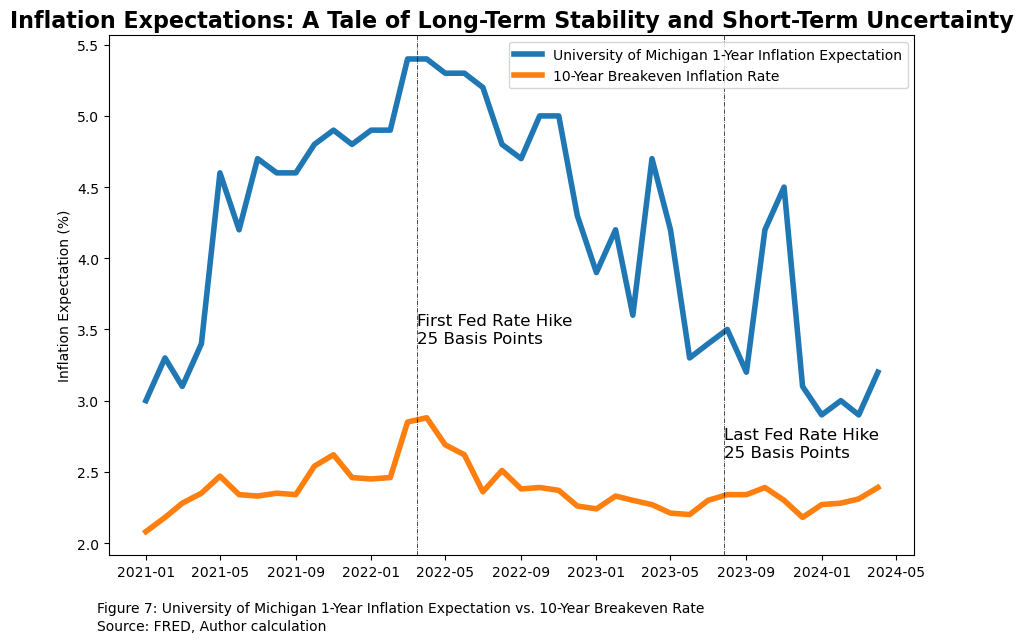

In [20]:
#| warning: false
#| echo: false

# Get dates for the FED rate hikes
first_rate_hike_date = pd.Timestamp('2022-03-17')
last_rate_hike_date = pd.Timestamp('2023-07-26')

# Create the bivariate plot
plt.figure(figsize=(9, 6))

# Plot the University of Michigan Inflation Expectation
sns.lineplot(data=mich_2021_2024, label='University of Michigan 1-Year Inflation Expectation', linewidth=4)

# Plot the 10-Year Breakeven Inflation Rate
sns.lineplot(data=t10yie_2021_2024, label='10-Year Breakeven Inflation Rate', linewidth=4)

# Adding a vertical line at March 17, 2022 for first FED hike
plt.axvline(x=first_rate_hike_date, color='black', linestyle='-.', linewidth=0.5)
# Adding a vertical line at July 26, 2023 for last FED hike
plt.axvline(x=last_rate_hike_date, color='black', linestyle='-.', linewidth=0.5)

# Adding the annotation for the first Fed rate hike
plt.text(first_rate_hike_date, 3.5, 
         'First Fed Rate Hike\n25 Basis Points', 
         ha='left', va='center', fontsize=12, color='black', rotation=0)

# Adding the annotation for the last Fed rate hike
plt.text(last_rate_hike_date, 2.7, 
         'Last Fed Rate Hike\n25 Basis Points', 
         ha='left', va='center', fontsize=12, color='black', rotation=0)

# Adding labels and title
plt.title('Inflation Expectations: A Tale of Long-Term Stability and Short-Term Uncertainty',
         fontsize=16, 
         fontweight='bold')
plt.ylabel('Inflation Expectation (%)')
plt.xlabel(None)

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

# Display the legend
plt.legend()

# Adding annotations to the figure
plt.figtext(0.06, -0.03, 'Figure 7: University of Michigan 1-Year Inflation Expectation vs. 10-Year Breakeven Rate', ha='left', fontsize=10)
plt.figtext(0.06, -0.06, 'Source: FRED, Author calculation', ha='left', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The increase in volatility and expectation levels observed from early 2021 to early 2022 coincides with Federal Reserve rate hikes, reflecting both economic recovery and normalization efforts following the pandemic's peak impact. However, while short-term metrics like the University of Michigan Inflation Expectation show elevated volatility and expectations above the Fed's target, the 10-Year Breakeven Inflation Rate remains anchored, suggesting a divergence in consumer sentiment versus market expectations.

This study acknowledges the complexity of inflation expectation dynamics and calls for further research integrating additional metrics to achieve a comprehensive understanding. Addressing these nuances will provide policymakers and stakeholders with essential insights for managing inflation and fostering economic stability.

## Conclusion

In conclusion, while inflation is normalizing towards the FED's 2% target after the COVID-19 pandemic shock, it remains above target and shows signs of persistence. This persistence is primarily driven by Supercore inflation and housing. Supercore inflation, mainly comprised of services impacted by wages. The public's inflation expectations are mixed: households expect higher inflation in the short term, but long-term expectations remain well-anchored and close to target, as market data indicates. This suggests that, despite a delayed response, the FED is currently managing inflation effectively. However, it remains uncertain whether the FED will achieve its target by the end of next year or later. This study's limitations include the absence of variables such as headline CPI, CPI components, wages and additional inflation expectations metrics like the Survey of Professional Forecasters. Incorporating these insights could offer a more thorough grasp of present inflation trends and stimulate further investigation.

## References

::: {#refs}
:::